In [ ]:
# Step 1: Initial settings
%cd /content/
!rm -rf elapy
!git clone https://github.com/okumakito/elapy.git
%cd ./elapy/
import elapy as ela

In [6]:
# Step 2: Load data
#   * {0,1}-valued matrix
#   * pandas DataFrame object
#   * rows are varibles
#   * columns are observations or time points

# load test data 
data = ela.load_testdata()

In [7]:
# Step 3: Main calculation

# Fit an Ising model to the data.
h, W = ela.fit_exact(data)

# Calculate a basin graph.
graph = ela.calc_basin_graph(h, W, data)

# Calculate a disconnectivity graph.
D = ela.calc_discon_graph(h, W, data, graph)

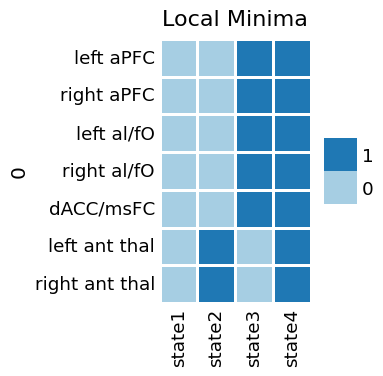

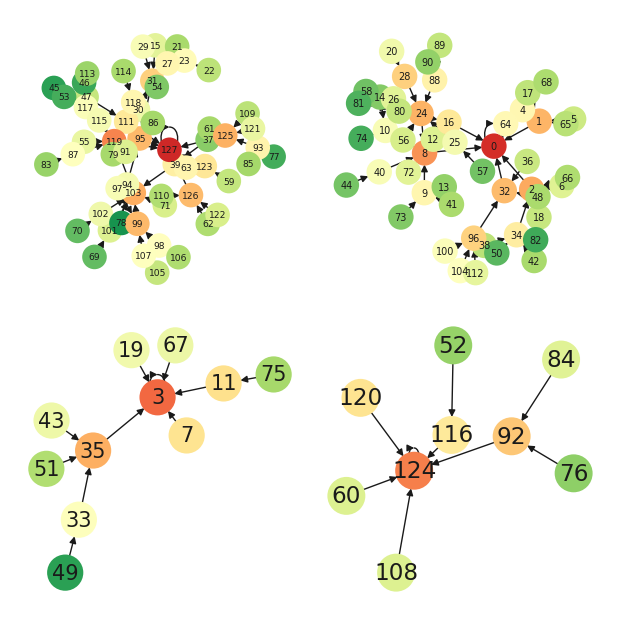

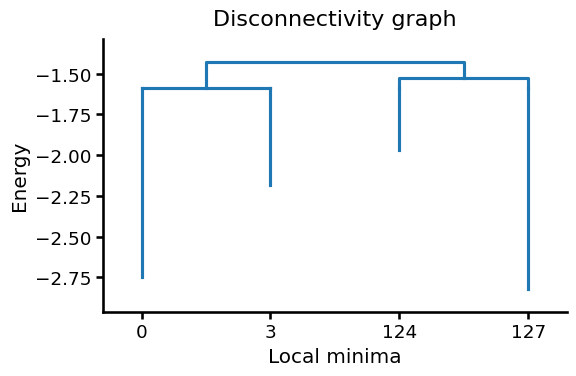

In [8]:
# Step 4: Plot results

# Plot on-off patterns of each local minimum.
ela.plot_local_min(data, graph)

# Plot the basin graph.
ela.plot_basin_graph(graph)

# Plot the disconnectivity graph.
ela.plot_discon_graph(D)